In [16]:
#import packages
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))



In [17]:
!pip install yfinance
import yfinance as yf

In [18]:
#read the file
from datetime import datetime
import pandas_datareader.data as web
start_train = datetime(2016, 12, 31)
end_train = datetime.today()
data_train = yf.download("AMZN", start=start_train, end=end_train)



[*********************100%***********************]  1 of 1 completed


In [19]:
df = pd.DataFrame(data_train)

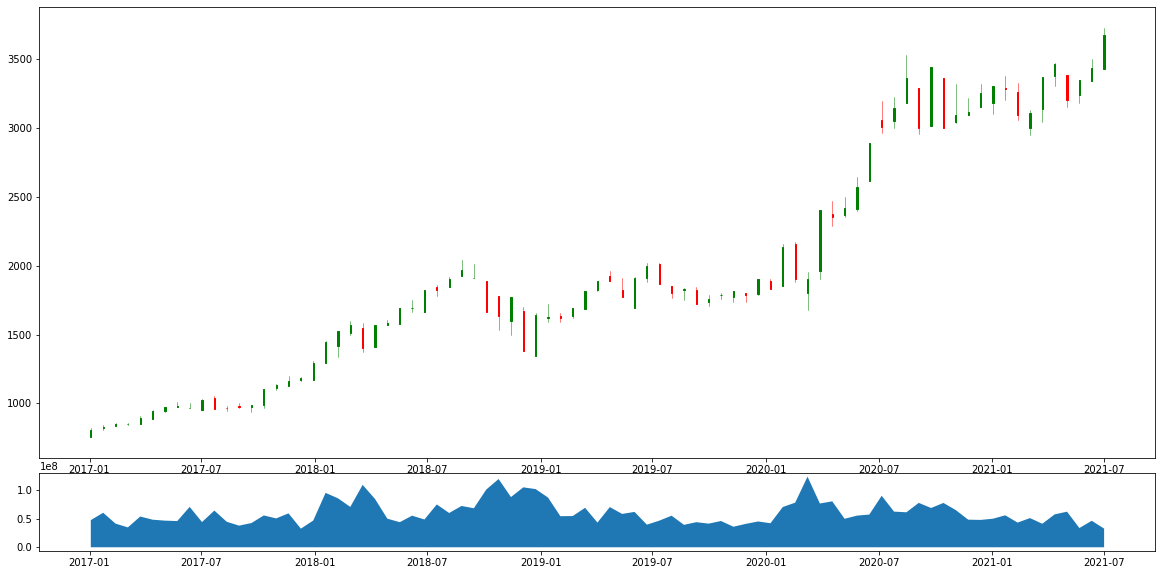

In [20]:
!pip install mpl-finance
# visualization candle stick
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd



df_ohlc= df['Close'].resample('20D').ohlc()
df_volume=df['Volume'].resample('20D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)
ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()



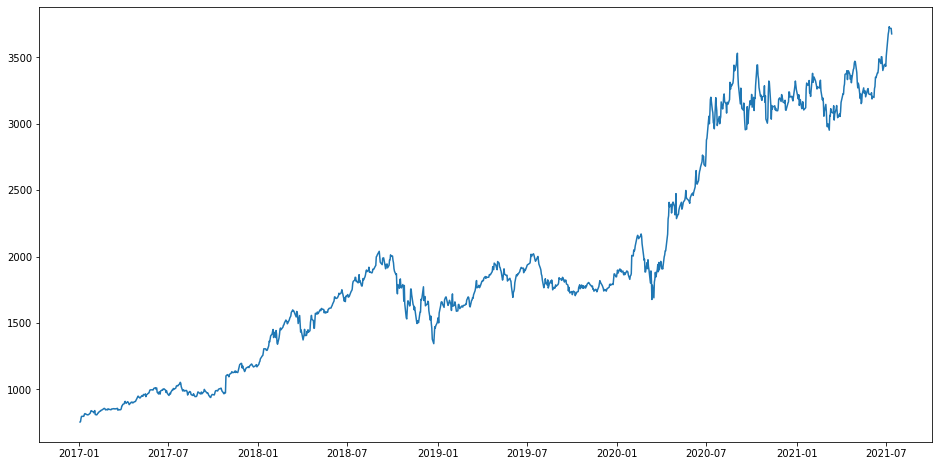

In [21]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [22]:
# data filtering until specified length of data

# filter the data just based on close price
data = df.filter(['Close'])
# converting the data into numpy array
dataset = data.values 
# just only 80% of the data set for the trainig, the rest 20% could be used for prediction (validation)
training_data_len = math.ceil( len(dataset) * .8) 

training_data_len


912

In [23]:
percentage = 20
d = int(np.ceil(training_data_len*(percentage/100)))
d

183

In [24]:
# scale the data for preprocessing the data before fed to learning algorithm
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)
scaled_data
#Scaled_data_len = scaler.fit_transform(training_data_len)

array([[0.        ],
       [0.00117875],
       [0.00899341],
       ...,
       [0.99594665],
       [0.99568133],
       [0.98184872]])

In [25]:

# create data set for training 

training_data_set = scaled_data [0:training_data_len, :]

# split the data from x_train_dataset and y_train_dataset 

x_train_dataset = []
y_train_dataset = []

for i in range(d, training_data_len):
  x_train_dataset.append(training_data_set[i-d:i,0])
  y_train_dataset.append(training_data_set[i,0])
  if i <= d:
    print(x_train_dataset)
    print(y_train_dataset)

[array([0.        , 0.00117875, 0.00899341, 0.01421212, 0.01452444,
       0.01418191, 0.01522968, 0.02013945, 0.02131483, 0.018823  ,
       0.01807075, 0.01859464, 0.01835621, 0.02156334, 0.0230947 ,
       0.02782313, 0.02870635, 0.02757126, 0.02576116, 0.02344395,
       0.02642272, 0.028975  , 0.01898421, 0.01812449, 0.0197566 ,
       0.02217791, 0.02273201, 0.02478055, 0.02782649, 0.02777947,
       0.02989852, 0.03038211, 0.03069443, 0.03451276, 0.03423402,
       0.0330855 , 0.03075151, 0.03189333, 0.03068434, 0.03338439,
       0.03198399, 0.03230975, 0.03121159, 0.03101347, 0.03251796,
       0.03335752, 0.03317618, 0.03389149, 0.03319969, 0.03334743,
       0.03349856, 0.0331258 , 0.03469074, 0.03006644, 0.03169854,
       0.03147018, 0.03087577, 0.03128212, 0.03436499, 0.04051731,
       0.04119569, 0.04462109, 0.04629015, 0.05143499, 0.05225777,
       0.04856369, 0.04742188, 0.0515055 , 0.04993384, 0.04787523,
       0.0439931 , 0.04980959, 0.05041073, 0.04887265, 0.0498

In [26]:
#to convert to numpy array
x_train, y_train = np.array(x_train_dataset), np.array(y_train_dataset)

#reshaping the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 1 here is the scaled closing price the 
x_train.shape

(729, 183, 1)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


In [35]:
# the model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))  

#return_sequences should be True because it has another LSTM layer for it, and the input_shape should be defined for the Input layer, first layer
#in input shape 1 there was the number of feature, i.e., the closing price

# add more LSTM model
model.add (LSTM(50, return_sequences=False))
model.add (Dense(15))
model.add (Dense(1))
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')

model.fit (x_train,y_train, batch_size=32, epochs=200,callbacks=[callback])

Epoch 1/200
23/23 [==============================] - 36s 168ms/step - loss: 0.0147
Epoch 2/200
23/23 [==============================] - 4s 166ms/step - loss: 0.0023
Epoch 3/200
23/23 [==============================] - 4s 169ms/step - loss: 8.6545e-04
Epoch 4/200
23/23 [==============================] - 4s 173ms/step - loss: 7.2526e-04
Epoch 5/200
23/23 [==============================] - 4s 170ms/step - loss: 6.8479e-04
Epoch 6/200
23/23 [==============================] - 4s 169ms/step - loss: 7.1957e-04
Epoch 7/200
23/23 [==============================] - 4s 170ms/step - loss: 6.9152e-04
Epoch 8/200
23/23 [==============================] - 4s 171ms/step - loss: 6.6567e-04
Epoch 9/200
23/23 [==============================] - 4s 168ms/step - loss: 6.2868e-04
Epoch 10/200
23/23 [==============================] - 4s 170ms/step - loss: 6.3035e-04
Epoch 11/200
23/23 [==============================] - 4s 171ms/step - loss: 6.2517e-04
Epoch 12/200
23/23 [==============================] - 4s 17

In [37]:
# preparing the test data (validation) and predicting with existing model for the validation

test_data = scaled_data[training_data_len-d: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 449 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(d,len(test_data)):
    x_test.append(test_data[i-d:i,0])

#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

59.13708476341949

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


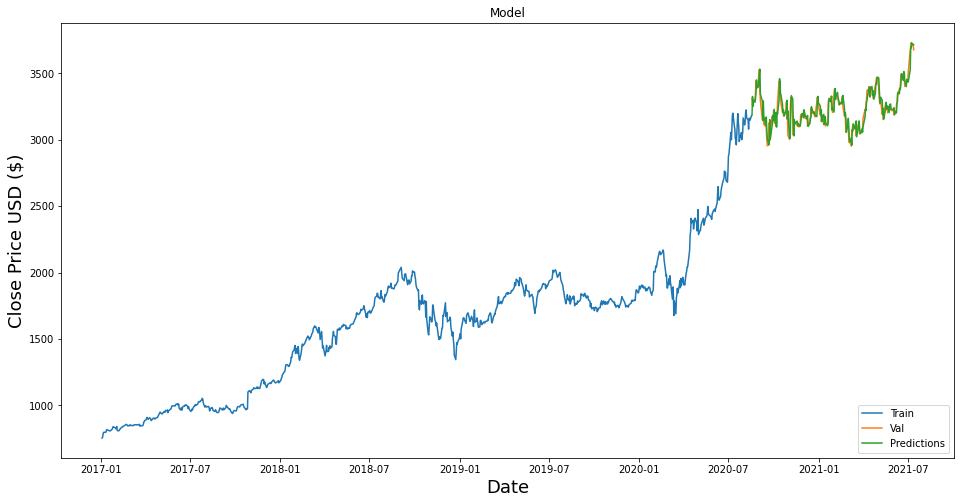

In [38]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()